In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

Removes peaks that are on a saddle in the distance transform (and are not actually a local peak).

generate input values:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 15
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 50 iterations
Regenerating free_sites after 61 iterations
Regenerating free_sites after 63 iterations
Number of spheres inserted: 63
Final volume fraction: 0.4879


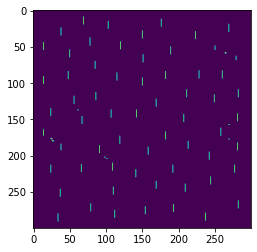

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=15, volume_fraction=0.5)
dt = ps.filters.distance_transform_lin(im, axis = 1, mode = "both")
r_max = 4
footprint = None
peaks = ps.filters.find_peaks(dt, r_max=4, footprint=None)
plt.imshow(peaks)
max_iters=10
verbose=1

apply filter:

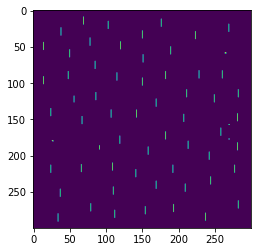

In [3]:
x = ps.filters.trim_saddle_points(peaks, dt, max_iters=10, verbose=1)
plt.imshow(x)